In [113]:
# What have we learned about facing the effects of a pandemic, globally?
    # Poorer Countries are the hardest hit when it comes to a pandemic
Calculate possible causes for excess deaths
While all countries were affected by COVID, poor countries were affected by covid with little recognition



    # Second Tier countries appear to be hit the hardest by COVID
    # Poor Countries, which are largely countries in africa, likely lack the resources to properly report cases
    # 
    # Some external factors are better correlated with deaths than others
# Are we better prepared for the NEXT health crisis?

# When looking at the Bloomberg and Oxford studies consider how the rankings were constructed. 

# What data did they use? How can we characterize responses? What is the range of responses
# across countries? Based on our analysis, what advice can we give our colleagues in other countries?”


SyntaxError: invalid syntax (<ipython-input-113-8574805a54c9>, line 3)

In [136]:
bob=pd.read_csv('bloomberg.csv',header=1)

In [115]:
#Don't Worry about this, these are just notes!!


# test_vector=bob['UNIVERSAL HEALTHCARE COVERAGE']+bob['PEOPLE COVERED BY VACCINES']*1.1
# test_vector=test_vector+bob['2021 GDP GROWTH FORECAST']-(bob['POSITIVE TEST RATE']*2.5)
# test_vector=test_vector+bob['COMMUNITY MOBILITY']-(bob['3-MONTH CASE FATALITY RATE']*8.6)-pow(bob['1-MONTH CASES PER 100,000'],1/2.1)
# test_vector=test_vector+(bob['VACCINATED TRAVEL ROUTES']/4.5)
# round(float(np.corrcoef(test_vector,bob['BLOOMBERG RESILIENCE SCORE'])[:1,1]),4)
#.9232

In [116]:
#PURPOSE:importing packages, which are basically just add-ons to make our lives easier, these ones are used for doing
# some math

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd


#PURPOSE:This is a function I wrote just for stripping characters from different entries so they can be an int data type
# I called the functions on the rows that I wanted to strip
def r_stripper(name):
    bob[name]=bob[name].str.rstrip('%')
    bob[name]=bob[name].str.replace("—","0") 
    bob[name]=bob[name].str.replace(",",'')
    bob[name]=bob[name].astype(float)
bob=pd.read_csv('bloomberg.csv',header=1)
r_stripper('PEOPLE COVERED BY VACCINES')
r_stripper('FLIGHT CAPACITY')
r_stripper('POSITIVE TEST RATE')
r_stripper('COMMUNITY MOBILITY')
r_stripper('UNIVERSAL HEALTHCARE COVERAGE')
r_stripper('TOTAL DEATHS PER 1 MILLION')
r_stripper('2021 GDP GROWTH FORECAST')
r_stripper('1-MONTH CASES PER 100,000')
r_stripper('3-MONTH CASE FATALITY RATE')

#PURPOSE: 
# Filter the numerical data, so bascially this is taking each column and giving it a ranking by percentile
# highest value in a column-->1 second highest --> (1-(1/50)) last -->0 and so on
df=bob
df_fix = df[[col for col in list(df.columns) if col in ['3-MONTH CASE FATALITY RATE','2021 GDP GROWTH FORECAST','UNIVERSAL HEALTHCARE COVERAGE','RANK', 'BLOOMBERG RESILIENCE SCORE','PEOPLE COVERED BY VACCINES','LOCKDOWN SEVERITY','FLIGHT CAPACITY','VACCINATED TRAVEL ROUTES','POSITIVE TEST RATE','COMMUNITY MOBILITY','HUMAN DEVELOPMENT INDEX','TOTAL DEATHS PER 1 MILLION']]]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(data = scaler.fit_transform(df_fix),
                         columns = df_fix.columns)

#PURPOSE: so this is me just bascially plugging in columns and then comparing that number ranking to the actual
#number ranking, and then checking correlation coefficient, for more information
# https://www.scribbr.com/statistics/correlation-coefficient/
test_vector=0
test_vector=bob['UNIVERSAL HEALTHCARE COVERAGE']+bob['PEOPLE COVERED BY VACCINES']*1.1
test_vector=test_vector+bob['2021 GDP GROWTH FORECAST']-(bob['POSITIVE TEST RATE']*2.5)
test_vector=test_vector+bob['COMMUNITY MOBILITY']-(bob['3-MONTH CASE FATALITY RATE']*8.6)-pow(bob['1-MONTH CASES PER 100,000'],1/2.1)
test_vector=test_vector+(bob['VACCINATED TRAVEL ROUTES']/4.5)
round(float(np.corrcoef(test_vector,bob['BLOOMBERG RESILIENCE SCORE'])[:1,1]),4)

0.9232

In [117]:
#quality
test_vector=bob['UNIVERSAL HEALTHCARE COVERAGE']+bob['2021 GDP GROWTH FORECAST']


In [118]:
a=90.0
b=73.8
c=14.8
d=8.6
e= -12
f= .2
g=953.0
h=396.0
t=(a+b)/2 + (c*.1) - (3*d) + e - (5*f) - pow(g,0.25) + (h/10)
t

78.6238594257465

In [119]:
test_vector.sort_values(ascending=False)

0     104.8
38     98.5
15     98.4
5      97.7
6      97.1
8      96.4
1      95.5
23     95.0
10     95.0
24     95.0
4      94.2
11     94.1
9      93.8
13     93.0
29     92.8
21     92.6
16     89.8
12     88.8
17     88.3
31     88.3
22     87.9
25     87.7
42     87.5
3      87.3
28     86.4
19     85.4
46     85.0
7      84.6
26     81.8
27     78.2
32     78.1
18     77.7
48     77.0
45     73.2
50     72.9
33     72.5
49     71.0
30     70.0
39     68.3
40     67.0
14     66.3
2      65.3
37     65.0
51     64.8
41     61.6
52     59.4
34     58.6
36     58.0
44     56.3
47     52.7
35     42.9
43     40.5
20      6.7
dtype: float64

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
var1= 'total_deaths_per_million'
var2='population_density'
workbook = pd.read_csv('data1.csv')
# final=workbook.loc[:,[var1,var2,'iso_code']].dropna()
# final=final.groupby('iso_code').max(var2)
# sns.regplot(y=final[var1],x=final[var2],color='red')
workbook
# for column1 in bob.columns:
#     for column2 in bob.columns:
#         if(column1 != column2):
#             final=workbook.loc[:,[column1,column2,'iso_code']].dropna()
#             final=final.groupby('iso_code').max(column1)
#             corel=np.corrcoef(final[column1],final[column2])
#             corel=round(corel[0,1],2)
#             if(corel > .70):
#                 print(corel,column1,column2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154906,ZWE,Africa,Zimbabwe,1/11/2022,223000.0,0.0,760.286,5180.0,0.0,14.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154907,ZWE,Africa,Zimbabwe,1/12/2022,224433.0,1433.0,768.000,5215.0,35.0,17.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154908,ZWE,Africa,Zimbabwe,1/13/2022,225084.0,651.0,700.857,5222.0,7.0,16.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
154909,ZWE,Africa,Zimbabwe,1/14/2022,225637.0,553.0,622.143,5238.0,16.0,14.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [187]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
# mask = np.zeros_like(workbook.corr())
# mask[np.triu_indices_from(mask)] = True
scaler = MinMaxScaler()
df=workbook
df_fix = df[[col for col in list(df.columns) if col in ['total_deaths_per_million',
                                                        'diabetes_prevalence','male_smokers',
                                                        'handwashing_facilities']]]
df_scaled = pd.DataFrame(data = scaler.fit_transform(df_fix),columns = df_fix.columns)
add_column=df_scaled['male_smokers']-df_scaled['handwashing_facilities']
df_scaled['total_deaths_per_million'].corr(add_column)

-0.1619975467022968

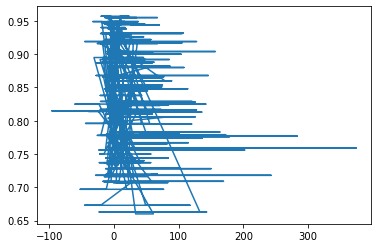

In [188]:
workbook.dropna(axis=0,subset=['excess_mortality'])
workbook=workbook[workbook['excess_mortality'].notnull()]
# plt.plot(workbook['excess_mortality'],workbook['gdp_per_capita'])
plt.plot(workbook['excess_mortality'],workbook['human_development_index'])

In [196]:
correlation_df=workbook.corr()
correlation_df.to_csv(path_or_buf='corr.csv',float_format='%.4f')
workbook['iso_code']
workbook['total_cases'].dtype == 'float64'

True

0.34915463833532356 excess_mortality extreme_poverty
66


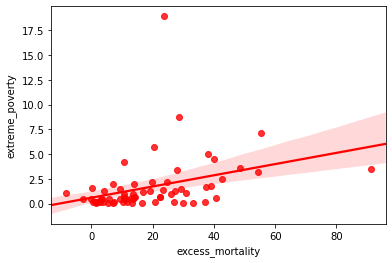

In [225]:
#There appears to be a correlation between Excess mortality and extreme poverty


column1= 'excess_mortality'
columns_selected=['gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index']
maax=0
maxOne=""
maxTwo=""
for column2 in columns_selected:
    if(column1 != column2 and workbook[column2].dtype == 'float64'):
        final=workbook.loc[:,[column1,column2,'iso_code']].dropna()
        final=final.groupby('iso_code').mean(column1)
        corel=np.corrcoef(final[column1],final[column2])
        coeff=corel[0,1]
        if(coeff > maax):
            maax=coeff
            maxOne=column1
            maxTwo=column2
print(maax,maxOne,maxTwo)
final=workbook.loc[:,[maxOne,maxTwo,'iso_code']].dropna()
final=final.groupby('iso_code').mean(column1)
sns.regplot(y=final[maxTwo],x=final[maxOne],color='red')
# plt.plot(final[maxTwo],final[maxOne],color='red')
print(len(final))

In [176]:
workbook

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
ABW,6.324368e+03,23.052632,24.007579,62.944444,0.611111,0.357222,58998.725842,215.053263,223.961211,587.195722,...,NaN,NaN,NaN,NaN,76.29,NaN,95.568421,12.115789,25.307368,891.538048
ALB,6.876158e+04,315.368421,303.766895,1254.421053,5.631579,5.225632,23934.270316,109.772211,105.734000,436.634105,...,7.1,51.2,NaN,2.89,78.57,0.795,5049.430000,17.624500,30.947000,1757.586495
AND,2.644100e+03,33.700000,31.228600,55.000000,0.400000,0.328500,34181.813500,435.659400,403.709900,711.016900,...,29.0,37.8,NaN,NaN,83.73,0.868,64.900000,32.142000,31.525000,838.999922
ARG,5.663872e+05,5996.300000,5882.185700,14420.800000,131.800000,141.557100,12419.186000,131.481200,128.978900,316.205300,...,16.2,27.7,NaN,5.00,76.67,0.845,7686.900000,1.708333,12.919167,168.550845
ARM,1.396139e+05,533.850000,556.657200,2673.250000,12.400000,11.471400,47037.695200,179.860850,187.545000,900.651900,...,1.5,52.1,94.043,4.20,75.09,0.776,8009.590000,24.749500,38.987000,2698.532543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKR,1.205259e+06,5294.100000,5482.649950,26676.150000,118.900000,130.171400,27728.256700,121.796400,126.134050,613.712900,...,13.5,47.4,NaN,8.80,72.06,0.779,39907.500000,3.956000,13.128500,918.114050
URY,1.326292e+05,632.850000,654.600150,1957.100000,10.100000,9.414200,38055.513800,181.584750,187.825400,561.553700,...,14.0,19.9,NaN,2.80,77.91,0.817,-181.510000,-2.218000,5.508500,-52.080942
USA,1.980061e+07,49153.865979,71799.276823,383497.771739,614.000000,1208.243696,59476.467186,147.646887,215.668458,1151.938728,...,19.1,24.6,NaN,2.77,78.86,0.926,426485.437113,12.006907,16.982165,1281.063762


In [151]:
 final=workbook.loc['iso_code','iso_code','iso_code'].dropna()

IndexingError: Too many indexers

In [109]:
workbook['handwashing_facilities'].dropna()

0         37.746
1         37.746
2         37.746
3         37.746
4         37.746
           ...  
154906    36.791
154907    36.791
154908    36.791
154909    36.791
154910    36.791
Name: handwashing_facilities, Length: 63887, dtype: float64

In [153]:
final=workbook.loc[:,['human_development_index','excess_mortality','iso_code']].dropna()
final=final.groupby('iso_code').mean('excess_mortality')
sns.regplot(y=final['human_development_index'],x=final['excess_mortality'],color='red')
np.corrcoef(final['excess_mortality'],final['human_development_index'])

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['iso_code'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [163]:
workbook.loc[:,['human_development_index','excess_mortality','iso_code']].dropna()
workbook['iso_code']

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['iso_code'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

array([[1.        , 0.51141054],
       [0.51141054, 1.        ]])

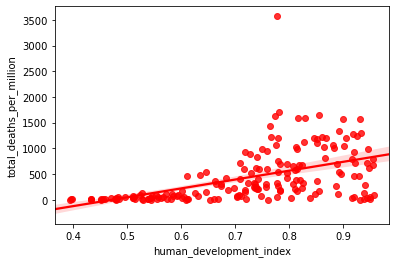

In [37]:
final=workbook.loc[:,['human_development_index','total_deaths_per_million','iso_code']].dropna()
final=final.groupby('iso_code').mean('total_deaths_per_million')
sns.regplot(x=final['human_development_index'],y=final['total_deaths_per_million'],color='red')
np.corrcoef(final['total_deaths_per_million'],final['human_development_index'])


In [127]:
#relevant finds
# 0.76 cardiovasc_death_rate hosp_patients_per_million

#0.52 male_smokers hosp_patients_per_million

# 0.73 female_smokers aged_65_older

# 0.96 new_deaths hosp_patients

#-0.5756315054269601 gdp_per_capita hosp_patients_per_million

#0.37 reproduction_rate human_development_index

#-0.78 hosp_patients_per_million new_vaccinations_smoothed_per_million

#-0.75 extreme_poverty handwashing_facilities

In [130]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_ad

In [115]:
final=workbook.loc[:,['date',var1,var2,'iso_code']].dropna()
final

,date,total_deaths_per_million,total_cases_per_million,iso_code
28,3/23/2020,0.025,1.004,AFG
29,3/24/2020,0.025,1.054,AFG
30,3/25/2020,0.025,1.858,AFG
31,3/26/2020,0.050,2.008,AFG
32,3/27/2020,0.050,2.284,AFG
...,...,...,...,...
154906,1/11/2022,343.224,14775.873,ZWE
154907,1/12/2022,345.543,14870.823,ZWE
154908,1/13/2022,346.007,14913.958,ZWE
154909,1/14/2022,347.067,14950.599,ZWE


<AxesSubplot:xlabel='human_development_index', ylabel='total_cases_per_million'>

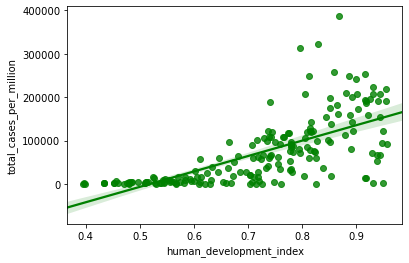

In [140]:
var
sns.regplot(y=var['total_cases_per_million'],x=var['human_development_index'],color='green')

In [108]:
# very high human development (0.8-1.0)
# array([[1.        , 0.09132327],
#        [0.09132327, 1.        ]])
# high human development (0.7-0.79)
# array([[1.        , 0.40545535],
#        [0.40545535, 1.        ]])
# medium human development (0.55-. 70)
# array([[1.        , 0.51311565],
#        [0.51311565, 1.        ]])
# and low human development (below 0.55).
# array([[1.        , 0.42181529],
#        [0.42181529, 1.        ]])

In [70]:
import pandas as pd
oxford = pd.read_csv('data2.csv')
oxford[oxford['CountryName'] == 'Zimbabwe']

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
138380,Zimbabwe,ZWE,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
138381,Zimbabwe,ZWE,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
138382,Zimbabwe,ZWE,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
138383,Zimbabwe,ZWE,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
138384,Zimbabwe,ZWE,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139123,Zimbabwe,ZWE,20220113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.78,NaN,63.1,NaN,54.17,NaN,61.9,NaN,0.0
139124,Zimbabwe,ZWE,20220114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.78,NaN,63.1,NaN,54.17,NaN,61.9,NaN,0.0
139125,Zimbabwe,ZWE,20220115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.78,NaN,63.1,NaN,54.17,NaN,61.9,NaN,0.0
139126,Zimbabwe,ZWE,20220116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,52.78,NaN,63.1,NaN,54.17,NaN,61.9,NaN,0.0
